13


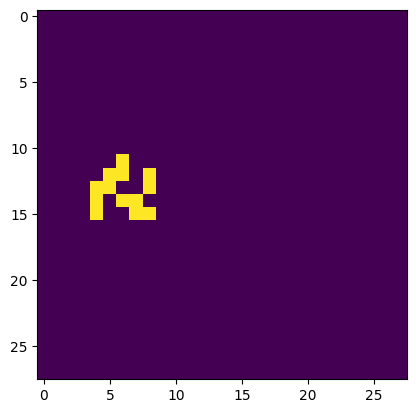

In [14]:
from masks import rf_mask, somatic_mask
import matplotlib.pyplot as plt
import math
img_size = 28
num_somas = 64
num_dendrites = img_size ** 2
connectivity = math.ceil(num_dendrites / num_somas)
print(connectivity)
d_local_mask = rf_mask([img_size,img_size], num_dendrites, num_somas,type='local', rf_size=16)
d_random_mask = rf_mask([img_size,img_size], num_dendrites, num_somas,type='random', rf_size=16)
d_global_mask = rf_mask([img_size,img_size], num_dendrites, num_somas,type='global', rf_size=16)
single_rf = d_local_mask[0].view(28,28)
s_mask = somatic_mask(200, 100)
plt.imshow(single_rf)
plt.show()

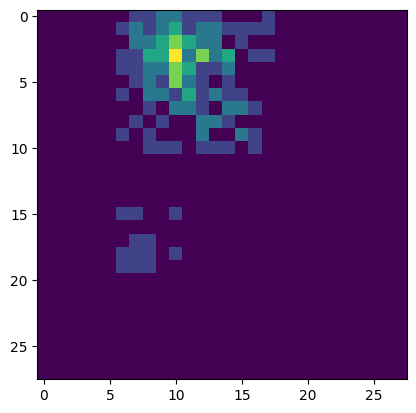

In [ ]:
import torch
global_rf = torch.sum(d_global_mask[13:26].view(-1,28,28), dim=0)
s_mask = somatic_mask(num_dendrites, num_somas)
plt.imshow(global_rf)
plt.show()

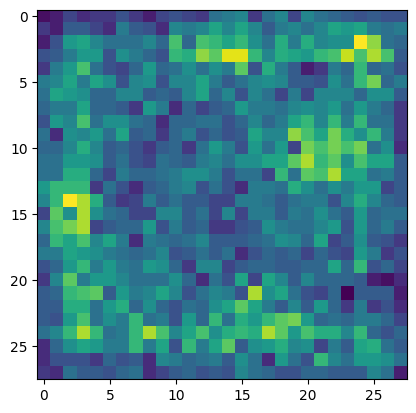

In [ ]:

summed = torch.sum(d_local_mask.view(-1, 28, 28), dim=0)
summed /= torch.max(summed)
plt.imshow(summed)
plt.show()

In [1]:
from models import dANN, vANN, count_parameters
from train import train, test
import torchvision.datasets as datasets
from torchvision.transforms import v2
from torch.utils.data import DataLoader
import os
import torch

train_transforms = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),  # Converts to [0,1] range
    v2.Normalize(mean=[0.1307], std=[0.3081])  # MNIST-specific normalization
])


os.makedirs('./data', exist_ok=True)

In [ ]:




mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=train_transforms)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=train_transforms)

train_loader = DataLoader(mnist_train, batch_size=128, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=128, shuffle=False)

sample = mnist_train[0]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = dANN([28,28], 256,32,10, 'local').to(device)
print(count_parameters(model))
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
epochs = 5

for i in range(epochs):
    train_loss = train(model, train_loader, optimizer, device)
    test_loss, accuracy = test(model, test_loader, device)
    print(f'train loss: {train_loss}, test loss: {test_loss}, test accuracy: {accuracy}')




cuda
209514


Testing: 100%|██████████| 625/625 [00:04<00:00, 151.56it/s]


train loss: 1.7225063505172729, test loss: 1.6521585905075074, test accuracy: 0.8078


Testing: 100%|██████████| 625/625 [00:04<00:00, 151.60it/s]


train loss: 1.6507577699661256, test loss: 1.6272512691497802, test accuracy: 0.8333


 12%|█▏        | 458/3750 [00:04<00:29, 112.18it/s]


KeyboardInterrupt: 

In [11]:
fmnist_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transforms)
fmnist_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=train_transforms)

train_loader = DataLoader(fmnist_train, batch_size=128, shuffle=True)
test_loader = DataLoader(fmnist_test, batch_size=128, shuffle=False)

sample = fmnist_train[0][0]
sample_target = fmnist_train[0][1]
print(sample_target)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = dANN([28,28], 1024,254,10, 'local').to(device)
print(count_parameters(model))
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
epochs = 20

for i in range(epochs):
    train_loss = train(model, train_loader, optimizer, device)
    test_loss, accuracy = test(model, test_loader, device)
    print(f'train loss: {train_loss}, test loss: {test_loss}, test accuracy: {accuracy}')

9
cpu
1066740


Testing: 100%|██████████| 79/79 [00:02<00:00, 27.09it/s]


train loss: 1.0156344885129664, test loss: 0.5623702093770232, test accuracy: 0.7966


Testing: 100%|██████████| 79/79 [00:02<00:00, 29.36it/s]


train loss: 0.4924597360177843, test loss: 0.4765417685237112, test accuracy: 0.8261


Testing: 100%|██████████| 79/79 [00:03<00:00, 23.75it/s]


train loss: 0.43252164141328603, test loss: 0.44022689929491354, test accuracy: 0.8415


Testing: 100%|██████████| 79/79 [00:03<00:00, 23.66it/s]


train loss: 0.40251569014622457, test loss: 0.4254935242329972, test accuracy: 0.8462


Testing: 100%|██████████| 79/79 [00:03<00:00, 24.34it/s]


train loss: 0.3826760805682587, test loss: 0.40882786882074573, test accuracy: 0.853


Testing: 100%|██████████| 79/79 [00:03<00:00, 24.00it/s]


train loss: 0.36787741861617895, test loss: 0.3924261671078356, test accuracy: 0.8562


Testing: 100%|██████████| 79/79 [00:03<00:00, 24.52it/s]


train loss: 0.35470034134413386, test loss: 0.3823119833876815, test accuracy: 0.8631


Testing: 100%|██████████| 79/79 [00:03<00:00, 23.80it/s]


train loss: 0.3443335847559768, test loss: 0.3736806383615808, test accuracy: 0.8658


Testing: 100%|██████████| 79/79 [00:03<00:00, 25.99it/s]


train loss: 0.33557420826034506, test loss: 0.36625154240976404, test accuracy: 0.8688


Testing: 100%|██████████| 79/79 [00:03<00:00, 22.41it/s]


train loss: 0.32656634463938566, test loss: 0.3652019417738613, test accuracy: 0.867


Testing: 100%|██████████| 79/79 [00:03<00:00, 20.32it/s]


train loss: 0.3203743046471305, test loss: 0.3546313818874238, test accuracy: 0.8727


Testing: 100%|██████████| 79/79 [00:03<00:00, 24.26it/s]


train loss: 0.3138698885944098, test loss: 0.3509423398896109, test accuracy: 0.8744


Testing: 100%|██████████| 79/79 [00:03<00:00, 24.05it/s]


train loss: 0.30799802016220623, test loss: 0.34510084986686707, test accuracy: 0.8771


 76%|███████▌  | 356/469 [00:21<00:06, 16.40it/s]


KeyboardInterrupt: 

In [20]:
fmnist_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transforms)
fmnist_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=train_transforms)

train_loader = DataLoader(fmnist_train, batch_size=128, shuffle=True)
test_loader = DataLoader(fmnist_test, batch_size=128, shuffle=False)

sample = fmnist_train[0][0]
sample_target = fmnist_train[0][1]
print(sample_target)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = vANN([28,28], 256,32,10).to(device)
print(count_parameters(model))
optimizer = torch.optim.Adam(model.parameters(), lr=.01)
epochs = 20

for i in range(epochs):
    train_loss = train(model, train_loader, optimizer, device, masked=False)
    test_loss, accuracy = test(model, test_loader, device)
    print(f'train loss: {train_loss}, test loss: {test_loss}, test accuracy: {accuracy}')

9
cuda
209514


  0%|          | 0/469 [00:00<?, ?it/s]

 52%|█████▏    | 246/469 [00:08<00:07, 29.03it/s]


KeyboardInterrupt: 

In [3]:
fmnist_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transforms)
fmnist_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=train_transforms)

train_loader = DataLoader(fmnist_train, batch_size=128, shuffle=True)
test_loader = DataLoader(fmnist_test, batch_size=128, shuffle=False)

sample = fmnist_train[0][0]
sample_target = fmnist_train[0][1]
print(sample_target)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model = dANN([28,28], 128,128 // 4, 10, 'global').to(device)
print(count_parameters(model))
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
epochs = 20

for i in range(epochs):
    train_loss = train(model, train_loader, optimizer, device)
    test_loss, accuracy = test(model, test_loader, device)
    print(f'train loss: {train_loss}, test loss: {test_loss}, test accuracy: {accuracy}')

9
cuda
104938


Testing: 100%|██████████| 79/79 [00:02<00:00, 30.51it/s]


train loss: 1.3343751462283673, test loss: 0.773855884618397, test accuracy: 0.7183


Testing: 100%|██████████| 79/79 [00:02<00:00, 32.15it/s]


train loss: 0.6990508116892914, test loss: 0.6794255047659331, test accuracy: 0.7555


Testing: 100%|██████████| 79/79 [00:02<00:00, 30.25it/s]


train loss: 0.6361310403230094, test loss: 0.6370434089551998, test accuracy: 0.7722


Testing:   5%|▌         | 4/79 [00:00<00:02, 25.52it/s]


KeyboardInterrupt: 

### Compare the different models across different parameters counts

In [ ]:
def train_model(dendrite_count, soma_ratio, device, train_loader, test_loader, model_type, rf_type, regularize):
    if model_type == 'dendritic':
        model = dANN([28,28], dendrite_count, int(dendrite_count * soma_ratio), 10, rf_type)
    if model_type == 'vanilla':
        model = vANN([28,28], dendrite_count, int(dendrite_count * soma_ratio), 10)
    else:
        raise NameError('Wrong model type!')
    if regularize:
        optimizer = torch.optim.Adam(model.parameters(), lr=.001, decoupled_weight_decay=.001)
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr=.001)
    epochs = 20
    for i in range(epochs):
        train_loss = train(model, train_loader, optimizer, device)
        test_loss, accuracy = test(model, test_loader, device)
        print(f'train loss: {train_loss}, test loss: {test_loss}, test accuracy: {accuracy}')        



fmnist_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transforms)
fmnist_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=train_transforms)

train_loader = DataLoader(fmnist_train, batch_size=128, shuffle=True)
test_loader = DataLoader(fmnist_test, batch_size=128, shuffle=False)



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)



paramter_counts = [128, 256, 512, 1024, 2048, 4096, 8192, 16384]
soma_ratios = [1/2, 1/4, 1/8]
image_size = [28,28]
for parameter_count in paramter_counts:
    for soma_ratio in soma_ratios:
        g_model = dANN(image_size, parameter_count, int(parameter_count * soma_ratio), 10, type = 'global')
        l_model = dANN(image_size, parameter_count, int(parameter_count * soma_ratio), 10, type = 'local')
        r_model = dANN(image_size, parameter_count, int(parameter_count * soma_ratio), 10, type = 'random')
        v_model = vANN(image_size, parameter_count, int(parameter_count * soma_ratio), 10)



print(count_parameters(model))
optimizer = torch.optim.Adam(model.parameters(), lr=.001)
optimizer_reg = torch.optim.Adam(model.parameters(), lr=.001, decoupled_weight_decay=.001)
epochs = 20

cuda


KeyboardInterrupt: 

: 

: 